# HST/WFC3 Grism Sensitivity

#### Kornpob Bhirombhakdi: kbhirombhakdi [at] stsci [dot] edu

This notebook plots the sensitivity of HST/WFC3 grisms (i.e., G102 and G141 for IR channel, and G280 for UVIS channel). The sensitivity files (i.e., hst_wfc3_ir_beams.h5 and hst_wfc3_uvis_beams.h5) can be found in the h5axeconfig package developed by Russell Ryan.

In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

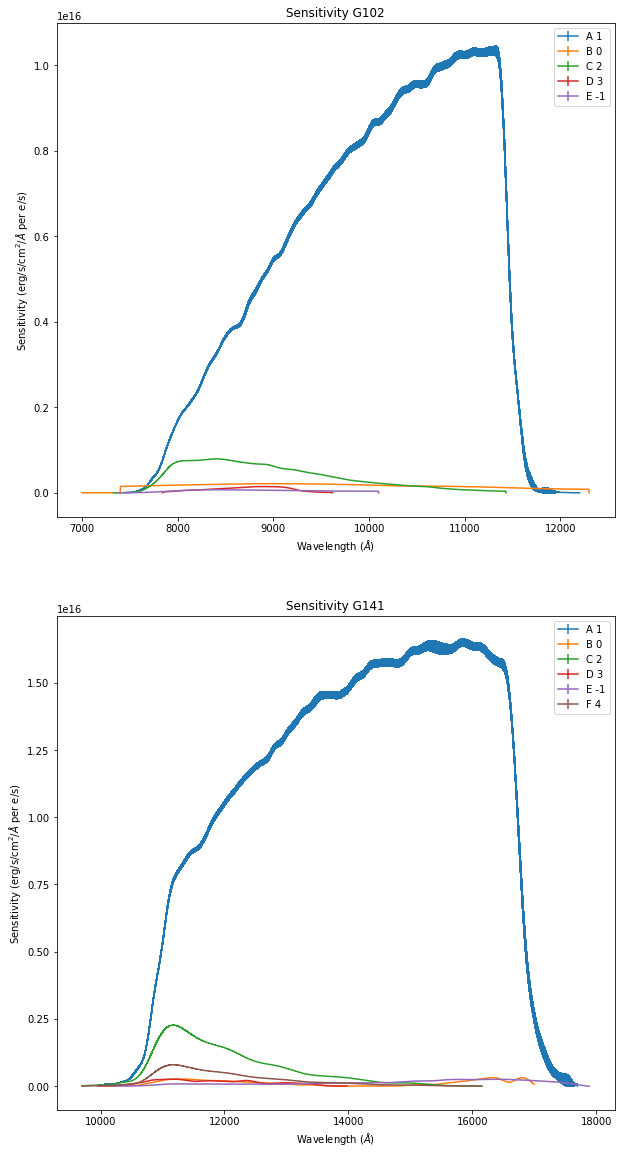

In [2]:
file = '/Users/kbhirombhakdi/_work/h5axeconfig-master/h5axeconfig/data/hst_wfc3_ir_beams.h5'

x = h5py.File(file, 'r')
fig,ax = plt.subplots(2,1,figsize=(10,20))
z = ['G102','G141']
for k in np.arange(len(z)):
    for i in x[z[k]]['IR'].keys():
        d = x[z[k]]['IR'][i]['sensitivity'][:]
        a,b,c = [],[],[]
        for j in d:
            a.append(j[0]),b.append(j[1]),c.append(j[2])
        e = x[z[k]]['IR'][i].attrs['order']
        lab = i + ' ' + str(e)
        ax[k].errorbar(a,b,c,label=lab)
#     ax[k].set_yscale('log')
#     ax[k].set_xscale('log')
    ax[k].set_xlabel('Wavelength ($\AA$)')
    ax[k].set_ylabel('Sensitivity (erg/s/cm$^2$/$\AA$ per e/s)')
    ax[k].set_title('Sensitivity {0}'.format(z[k]))
    ax[k].legend()
plt.savefig('./hst_wfc3_ir_sensitivity.pdf',format='pdf')
plt.show()

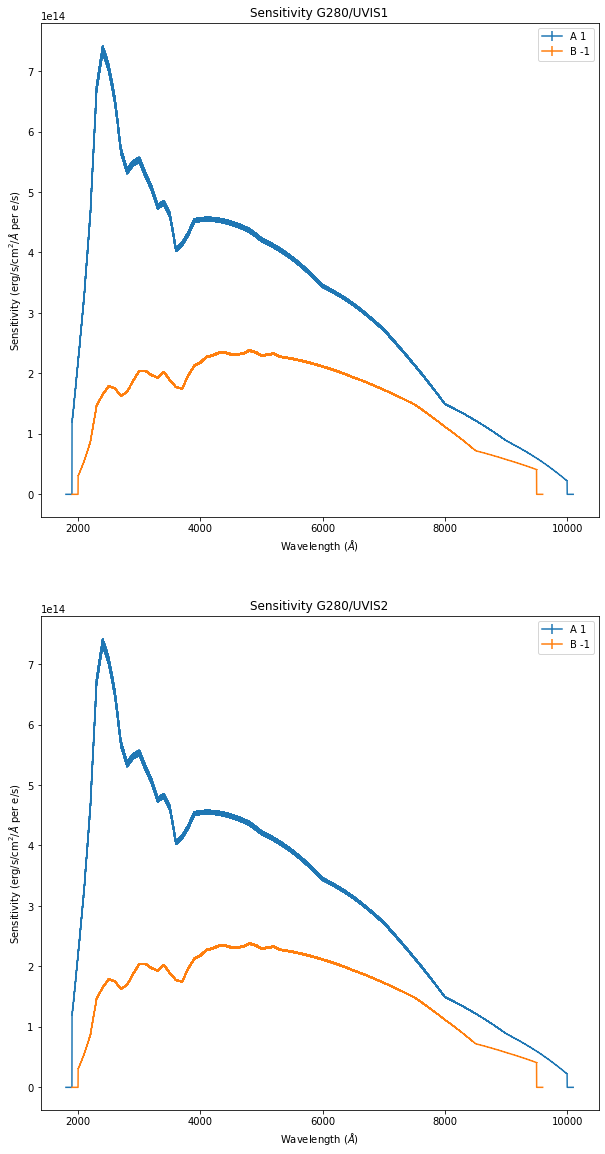

In [3]:
file = '/Users/kbhirombhakdi/_work/h5axeconfig-master/h5axeconfig/data/hst_wfc3_uvis_beams.h5'

x = h5py.File(file, 'r')
fig,ax = plt.subplots(2,1,figsize=(10,20))
z = ['UVIS1','UVIS2']
for k in np.arange(len(z)):
    for i in x['G280'][z[k]].keys():
        d = x['G280'][z[k]][i]['sensitivity'][:]
        a,b,c = [],[],[]
        for j in d:
            a.append(j[0]),b.append(j[1]),c.append(j[2])
        e = x['G280'][z[k]][i].attrs['order']
        lab = i + ' ' + str(e)
        ax[k].errorbar(a,b,c,label=lab)
#     ax[k].set_yscale('log')
#     ax[k].set_xscale('log')
    ax[k].set_xlabel('Wavelength ($\AA$)')
    ax[k].set_ylabel('Sensitivity (erg/s/cm$^2$/$\AA$ per e/s)')
    ax[k].set_title('Sensitivity G280/{0}'.format(z[k]))
    ax[k].legend()
plt.savefig('./hst_wfc3_uvis_sensitivity.pdf',format='pdf')
plt.show()